<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/Processo_de_decis%C3%A3o_com_predi%C3%A7%C3%A3o__anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conceitos**

Processo de decisão:
1. Definir o problema
* Entender a situação
* Entender os objetivos
2. Identificar as alternativas
* Discussão dos detalhes do problema
* criação das alternativas
3. Definir o modelo para o problema
* Modelo de incerteza
* Modelo de preferência
4. Classificar as melhores alternativas
* Definir no tipo de score
* Ponderar as alternativas
5. Implementar a melhor solução
* Tomar a decisão
* Comunicar aos grupos


Uma análise descritiva permite entender como os indivíduos pensam e se comportam, como percebem as incertezas como aprendem e se adaptam às situações. Esse tipo de análise requer bastante observação empírica dos envolvidos.

A análise preditiva com a finalidade de entender cenários futuros e assim, auxiliar nas tomadas de decisão.
Dado que temos um processo de decisão, podemos utilizar avóres de decisão para melhor estruturar o problema. Nessa metodologia, podemos mapear os possíveis cresultados das escolhas relacionadas. Ou seja, o analista combinará os possíveis resultados e as probabilidades desses resultados ocorrerem.


# **Prático - Análise de Decisão**

In [ ]:
# importação das bibliotecas gerais
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Bibliotecas preditiva
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# carga dos dados
dados = pd.read_csv('/content/drive/MyDrive/Asset_FIAP/dados_credito_small.csv')
# Leitura das 5 primeiras linhas
dados.head()

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]"
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]"
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]"
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]"
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]"


In [ ]:
# Ajuste da coluna default transformando tudo o que for pagou em 1 (númerico), os algoritmos trabalha apenas com variaveis númericas
# np.where é equivalente ao if else
dados['target'] = np.where(dados['default'] == 'pagou', 1, 0)
dados.head()

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,target
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]",0
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]",1
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]",1
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]",1
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]",0


**Análise descritiva**

In [ ]:
# Média entre as variaveis
dados.groupby('default')    .agg(idade_media = pd.NamedAgg('idade', 'mean'),
          renda_media = pd.NamedAgg('renda', 'mean'),
          divida_media = pd.NamedAgg('divida', 'mean'),
          outras_div_media = pd.NamedAgg('outras_div', 'mean')).reset_index()

,default,idade_media,renda_media,divida_media,outras_div_media
0,nao_pagou,33.410853,44.612403,14.597674,4.106667
1,pagou,35.156334,45.641509,8.698383,2.647197


In [ ]:
# Média de pessoas pelos atributos
dados.groupby('default') \
      .agg(idade_media = pd.NamedAgg('idade', 'median'),
          renda_media = pd.NamedAgg('renda', 'median'),
          divida_media = pd.NamedAgg('divida', 'median'),
          outras_div_media = pd.NamedAgg('outras_div', 'median')) \
      .reset_index()

,default,idade_media,renda_media,divida_media,outras_div_media
0,nao_pagou,31.0,29.0,14.2,2.62
1,pagou,35.0,35.0,7.2,1.74


**Análise Preditiva**

In [ ]:
# categoria educacao
dados.groupby(['default', 'educacao_cat']).agg(n = pd.NamedAgg('id', 'count')).reset_index()
# categoria faixa etária
dados.groupby(['default', 'idade_cat']).agg(n = pd.NamedAgg('id', 'count')).reset_index()

,default,idade_cat,n
0,nao_pagou,abaixo_30,57
1,nao_pagou,acima_40,27
2,nao_pagou,entre_30_40,45
3,pagou,abaixo_30,119
4,pagou,acima_40,89
5,pagou,entre_30_40,163


In [ ]:
# logistica statsmodels
# Treinamento do modelo
logistic_model_sm = sm.logit(formula = 'target ~ renda + divida + outras_div + C(educacao_cat) + C(idade_cat)', data = dados).fit()

**Divisão do modelo em treino e teste**

In [ ]:
# Divisão dos dados
# Nesse modelo vai ser utilizado 25% dodos para amostra de teste
# O random_state = 6451 é utilizado para manter sempre a mesma amostragem, se for necessario sempre valores diferente não especificar essa coluna
train_data, test_data = train_test_split(dados,
                                         test_size = 0.25,
                                         random_state = 6451)

**Adaptação das variáveis categoricas**

In [ ]:
# A ideia principal é mostrar para a maquina que determinadas categorias pode ser transformada em colunas e na presença do valor (ex: 1) e a ausência como 0
# Esse tratamento é conhecido como variáveis dummies

# Ajuste da categoria educacao_cat
educacao_data_train = pd.get_dummies(data=train_data['educacao_cat'], drop_first=True)
educacao_data_test = pd.get_dummies(data=test_data['educacao_cat'], drop_first=True)

# Ajuste da categoria idade_cat
idade_data_train = pd.get_dummies(data=train_data['idade_cat'], drop_first=True)
idade_data_test = pd.get_dummies(data=test_data['idade_cat'], drop_first=True)

In [ ]:
educacao_data_train.head()

,ensin_medio,ensin_sup
237,1,0
22,0,0
226,1,0
43,0,0
278,0,0


In [ ]:
idade_data_train.head()

,acima_40,entre_30_40
237,0,1
22,0,0
226,0,0
43,0,1
278,0,0


**Treinamento do modelo**

In [ ]:
# Seleção das colunas que vão se utilizadas no treino
cols_reg = ['renda', 'divida', 'outras_div']
# Filtrando as colunas que vão ser utilizadas
X = train_data[cols_reg]
# Combinando as colunas de X com as variáveis dummies
X = pd.concat([X, educacao_data_train, idade_data_train], axis=1)
y = train_data['target']

In [ ]:
X.head()

,renda,divida,outras_div,ensin_medio,ensin_sup,acima_40,entre_30_40
237,15,9.1,1.25,1,0,0,1
22,26,10.0,2.17,0,0,0,0
226,44,18.1,4.26,1,0,0,0
43,48,13.1,4.36,0,0,0,1
278,17,3.7,0.18,0,0,0,0


In [ ]:
y.head()

237    0
22     1
226    1
43     1
278    0
Name: target, dtype: int64

In [ ]:
# Dados do modelo
model_logistic = LogisticRegression(max_iter = 1000)
# Treinamento do modelo
model_logistic.fit(X, y)

LogisticRegression(max_iter=1000)

In [ ]:
# Exibição dos coeficientes
betas = np.append(model_logistic.intercept_, model_logistic.coef_)
# Criação da tabela com base nas colunas existentes da variavel x
colunas = ['intercept']+X.columns.to_list()
# Criação do data frame com os nomes das colunas e os valores de betas
coeficientes = pd.DataFrame(betas, colunas, columns=['Coeficientes'])
coeficientes

,Coeficientes
intercept,2.626749
renda,-0.004569
divida,-0.154137
outras_div,0.096649
ensin_medio,-0.536212
ensin_sup,-0.645961
acima_40,0.479814
entre_30_40,0.527732


**Avalição do Modelo**

In [ ]:
# Seleção das colunas que vão se utilizadas no treino
cols_reg = ['renda', 'divida', 'outras_div']
# Filtrando as colunas que vão ser utilizadas
X_test = test_data[cols_reg]
# Combinando as colunas de X com as variáveis dummies
X_test = pd.concat([X_test, educacao_data_test, idade_data_test], axis=1)
y_test = test_data['target']

In [ ]:
# Previsão dos dados
y_pred = model_logistic.predict(X_test)

In [ ]:
# Associação das classe para facilitar a visualização
classes = dados['default'].unique()

In [ ]:
# Calculando a matriz confusão
conf_matrix = confusion_matrix(y_test, y_pred)

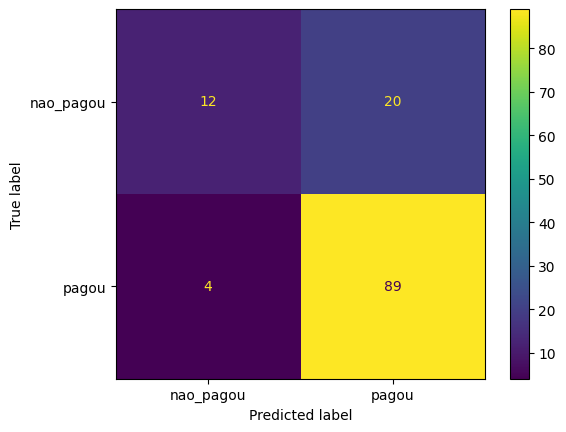

In [ ]:
# Visualização da matriz em gráfico
conf_matrix_chart = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
conf_matrix_chart.plot()

O modelo previu que 12 pessoas não iria pagar e ela realmente não pagou, e também previu que 89 iria pagar e realmente pagou, esse são os verdadeiros positivos.

Porém teve os falsos positivos onde o modelo disse que 20 pessoas iria pagar e elas não pagaram.

É o Falsos negativos onde 4 pessoas o modelo previu que não iria pagar e elas realizaram o pagamento.

**Análise Prescritiva**

In [ ]:
# Acuracia, o quanto ele está acertando
accuracy_score(y_test, y_pred)

0.808

In [ ]:
# Calculos de erros
falsos_positivos = conf_matrix[0][1]
falsos_negativos = conf_matrix[1][0]

# Calculos de acertos
verdadeiros_positivos = conf_matrix[1][1]

In [ ]:
falsos_positivos, falsos_negativos, verdadeiros_positivos

(20, 4, 89)

In [ ]:
# Custos que essa análise pode gerar para empresa
nao_pagamento = 1000
custo_cobranca = 100
recuperar_divida = 1000

In [ ]:
# Custos totais de cobrar e nao receber
deixou_receber = falsos_positivos * nao_pagamento

# Custos totais de nao cobrar
deixar_receber_por_nao_cobrar = falsos_negativos * recuperar_divida

# Custos operacionais da cobrança
custo_cobranca_total = custo_cobranca * (verdadeiros_positivos + falsos_positivos)

# Retornos
retorno_cobrar_correto = verdadeiros_positivos * recuperar_divida

# Lucro
lucro = retorno_cobrar_correto - (deixar_receber_por_nao_cobrar + deixou_receber + custo_cobranca_total)

deixou_receber, deixar_receber_por_nao_cobrar, custo_cobranca_total, retorno_cobrar_correto, lucro

(20000, 4000, 10900, 89000, 54100)

Quanto maior for a acuracia desse modelo maiores são os lucros, se a acuracia do modelo cair é necessário treinar novamente o modelo.